In [1]:
import cv2
import numpy as np
from pathlib import Path
from superpoint.datasets.patches_dataset import PatchesDataset
from utils import plot_imgs
from superpoint.models.classical_detectors_descriptors import classical_detector_descriptor

from superpoint.settings import DATA_PATH
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
config = {'name': 'patches_dataset', 'dataset': 'hpatches', 'alteration': 'v', 'preprocessing': {'resize': [240, 360]}} #'truncate': 50, 
dataset = PatchesDataset(**config)
data = dataset.get_test_set()

In [3]:
def draw_keypoints(img, corners, color):
    keypoints = [cv2.KeyPoint(c[1], c[0], 1) for c in np.stack(corners).T]
    return cv2.drawKeypoints(img.astype(np.uint8), keypoints, None, color=color)

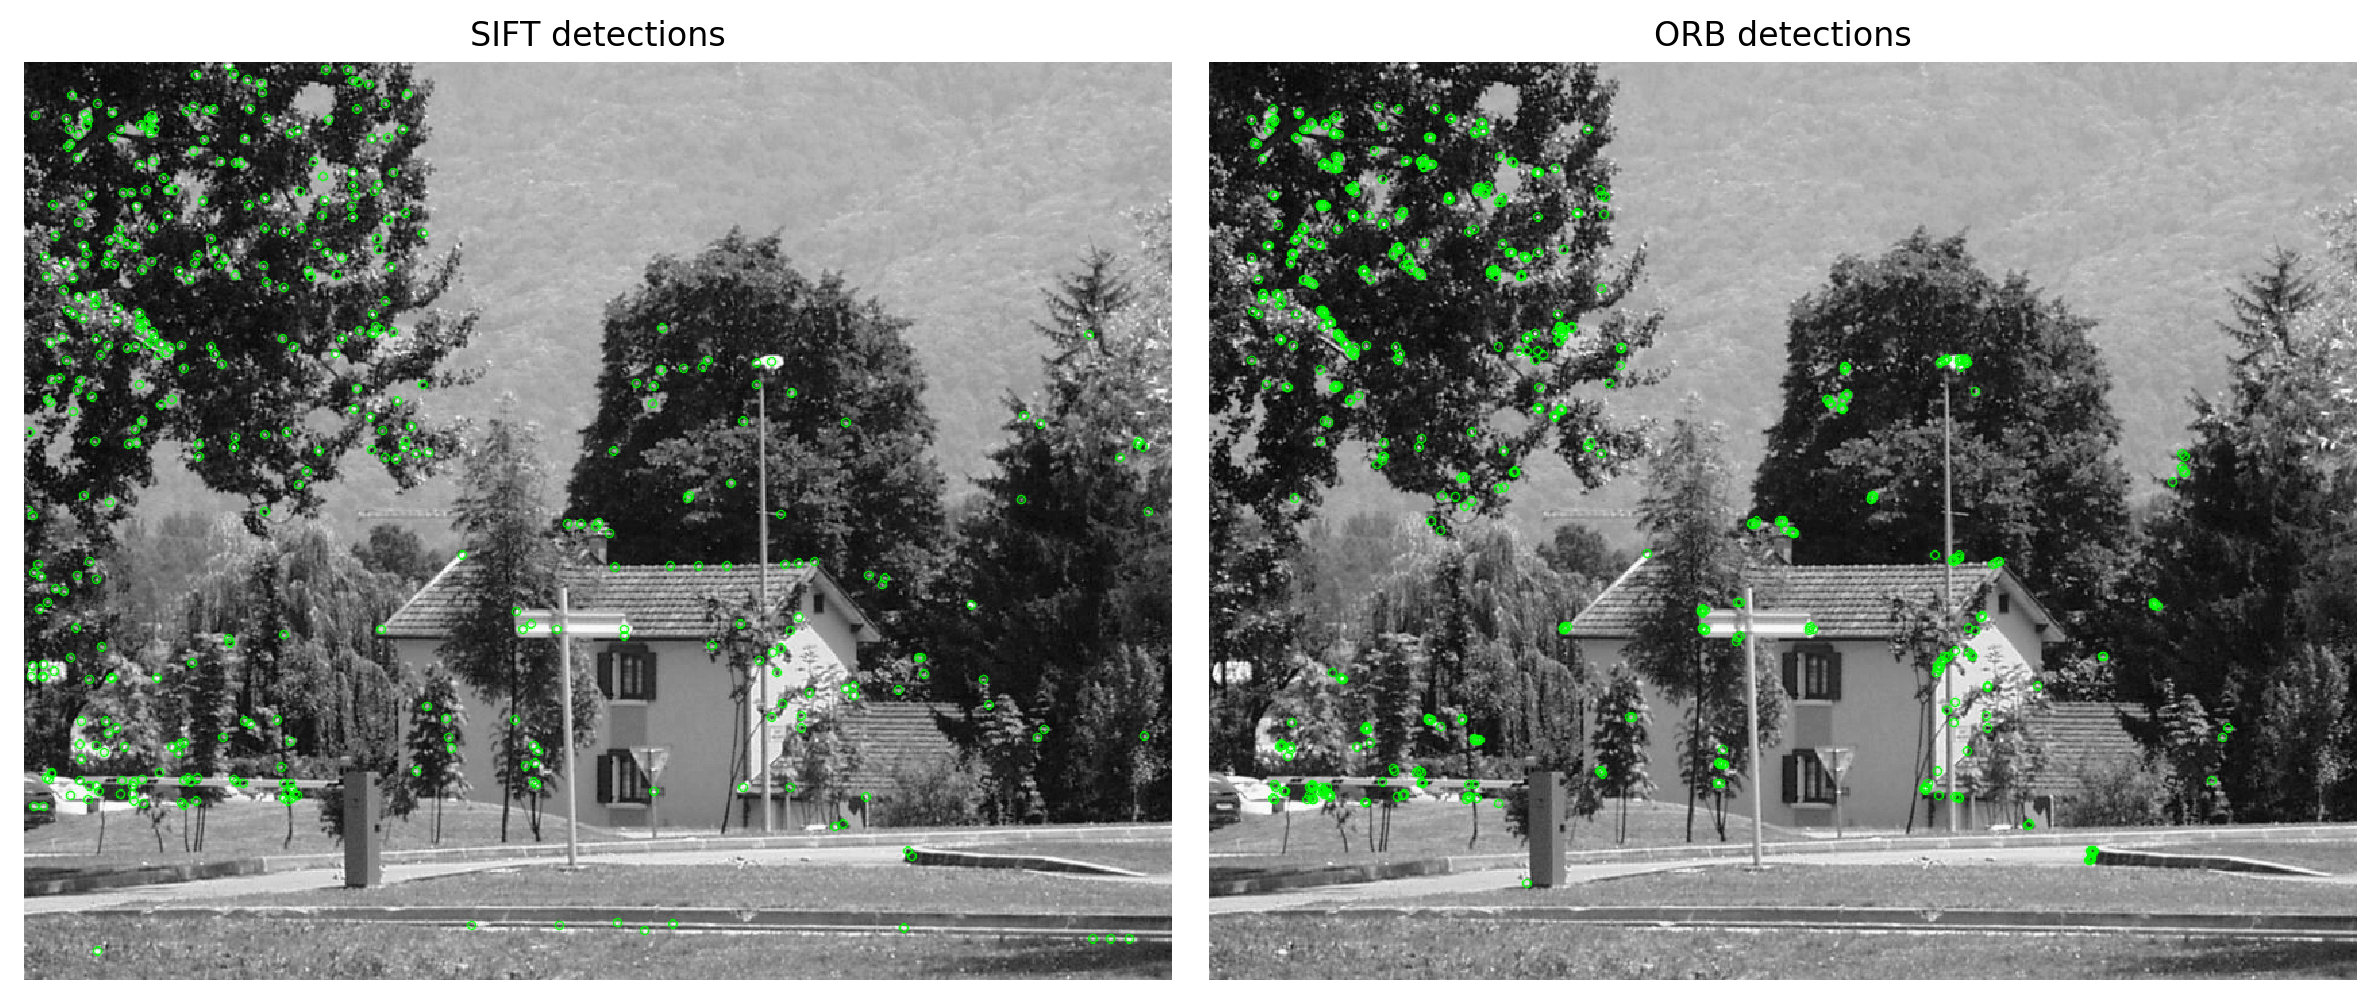

In [4]:
image = cv2.imread(str(Path(DATA_PATH, "HPatches/v_eastsouth/", "1.ppm")), 0)
sift_points, sift_desc = classical_detector_descriptor(image, **{'method': 'sift'})
sift_points = np.where(sift_points)
orb_points, orb_desc = classical_detector_descriptor(image, **{'method': 'orb'})
orb_points = np.where(orb_points)

sift_img = draw_keypoints(image.copy() * 255, sift_points, (0, 255, 0))
orb_img = draw_keypoints(image.copy() * 255, orb_points, (0, 255, 0))

plot_imgs([sift_img / 255., orb_img / 255.], titles=['SIFT detections', 'ORB detections'], dpi=200, cmap='gray')